<h1>Sandra Field </h1>
MSDS 432, Dr Ali <br>
Spring 2021<br>
Comparing Search Algorithms<br>

In [130]:
import math
from scipy import stats
import numpy as np
import pandas as pd
import time
import timeit
from time import perf_counter, perf_counter_ns
from random import seed
from random import random
import matplotlib.pyplot as plt
#import matplotlib.style as style
import seaborn as sns
%matplotlib inline

sns.set_style('white')


<h1>Exploration</h1>

In [76]:
# Below are five arrays, each of length 512, 1024, 2048, 4096,
# and 8192 containing randomly generated uniformly distributed 
# integers from 1 to 10000, sorted from smallest to largest

np.random.seed(42)
arr1 = sorted(np.random.uniform(1,1000,512).astype(int))
arr2 = sorted(np.random.uniform(1,1000,1024).astype(int))
arr3 = sorted(np.random.uniform(1,1000,2048).astype(int))
arr4 = sorted(np.random.uniform(1,1000,4096).astype(int))
arr5 = sorted(np.random.uniform(1,1000,8192).astype(int))

In [78]:
#View sample data. Looks like we have MANY duplicates, but it's because 
#the arrays are larger than the population data

print("Array 1\n",arr1[0:20])
print("Array 2\n",arr2[0:20])
print("Array 3\n",arr3[0:20])
print("Array 4\n",arr4[0:20])
print("Array 5\n",arr5[0:20])

Array 1
 [6, 6, 7, 10, 11, 12, 13, 15, 16, 17, 19, 21, 24, 25, 26, 26, 27, 31, 32, 35]
Array 2
 [5, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 18, 19, 19, 19, 20, 21, 22, 23, 23]
Array 3
 [1, 1, 2, 2, 2, 2, 4, 4, 5, 6, 6, 6, 8, 8, 9, 9, 9, 10, 10, 10]
Array 4
 [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 4, 4, 5, 6, 7, 7, 7, 7, 7]
Array 5
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3]


In [144]:
def binary_search(mylist, item):
    #print("\nFull search set is {0}\n".format(mylist))  
    
    # low and high keep track of which part of the list you'll search in.
    low_idx = 0
    high_idx = len(mylist) - 1

    ## Added by Lance
    counter = 0
    ## Added by Lance

    # While you haven't narrowed it down to one element ...
    while low_idx <= high_idx:
        # ... check the middle element
        mid_idx = (low_idx + high_idx) // 2
        guess = mylist[mid_idx]

        counter = counter + 1

        # Found the item.
        if guess == item:
            return mid_idx
        # The guess was too high.
        if guess > item:
            high_idx = mid_idx - 1
        # The guess was too low.
        else:
            low_idx = mid_idx + 1

        ## Added by Lance
        #print("counter: {0}\nmid index: {1}\nmid value: {2}\nNew search set is now {3} to {4}\n".\
         #     format(counter, mid_idx, mylist[mid_idx], mylist[low_idx], mylist[high_idx+1]))
        ## Added by Lance

  # Item doesn't exist
    return None

In [145]:
def linear_search(mylist, item):
    i = 0
    while i < len(mylist):
        if mylist[i] == item:
            return i
        else:
            i = i + 1
        ## Added by Lance
        #print("counter {0}\nNew search set is {1} numbers\n".format(i, len(list[i:]))
        ## Added by Lance
        
    return None

In [91]:
#Lets compare sort methods and pick one
start_time = time.time()
set2 = np.sort(np.random.randint(0, 10000000, 10000000))
end_time = time.time()
print(end_time - start_time)



0.6712062358856201


In [92]:
#Sorted() takes MUCH longer than np.sort. 

start_time = time.time()
set2 = sorted(np.random.randint(0, 10000000, 10000000))
end_time = time.time()
print(end_time - start_time)

6.4323484897613525


In [73]:
#Lets test some numbers.  Is 17 in the list of numbers?
print(binary_search(arr1, 17))




Full search set is [6, 6, 7, 10, 11, 12, 13, 15, 16, 17, 19, 21, 24, 25, 26, 26, 27, 31, 32, 35, 36, 37, 38, 41, 41, 44, 46, 46, 46, 46, 47, 52, 52, 57, 58, 59, 64, 65, 70, 71, 72, 73, 74, 74, 75, 77, 78, 79, 82, 84, 85, 85, 85, 86, 89, 91, 92, 92, 94, 94, 94, 95, 98, 98, 98, 101, 102, 102, 104, 108, 110, 112, 114, 116, 116, 117, 118, 119, 119, 120, 120, 122, 127, 138, 140, 140, 141, 143, 145, 156, 156, 157, 161, 162, 162, 163, 163, 170, 171, 174, 174, 175, 177, 178, 182, 184, 185, 187, 187, 188, 196, 196, 196, 199, 200, 213, 216, 222, 224, 225, 227, 228, 229, 238, 238, 240, 242, 242, 244, 248, 250, 250, 252, 258, 259, 265, 271, 272, 278, 279, 280, 281, 281, 281, 282, 282, 285, 286, 287, 290, 291, 292, 293, 294, 295, 301, 304, 305, 310, 311, 312, 315, 317, 318, 319, 319, 320, 321, 323, 323, 325, 326, 326, 329, 331, 338, 338, 339, 341, 341, 349, 351, 353, 356, 357, 359, 360, 360, 364, 366, 368, 368, 370, 371, 372, 374, 375, 375, 375, 376, 376, 385, 386, 387, 388, 389, 389, 393, 399, 40

In [74]:
# 'None' means nil in Python. We use to indicate that the item wasn't found.
print(binary_search(arr1, -1)) # => None



Full search set is [6, 6, 7, 10, 11, 12, 13, 15, 16, 17, 19, 21, 24, 25, 26, 26, 27, 31, 32, 35, 36, 37, 38, 41, 41, 44, 46, 46, 46, 46, 47, 52, 52, 57, 58, 59, 64, 65, 70, 71, 72, 73, 74, 74, 75, 77, 78, 79, 82, 84, 85, 85, 85, 86, 89, 91, 92, 92, 94, 94, 94, 95, 98, 98, 98, 101, 102, 102, 104, 108, 110, 112, 114, 116, 116, 117, 118, 119, 119, 120, 120, 122, 127, 138, 140, 140, 141, 143, 145, 156, 156, 157, 161, 162, 162, 163, 163, 170, 171, 174, 174, 175, 177, 178, 182, 184, 185, 187, 187, 188, 196, 196, 196, 199, 200, 213, 216, 222, 224, 225, 227, 228, 229, 238, 238, 240, 242, 242, 244, 248, 250, 250, 252, 258, 259, 265, 271, 272, 278, 279, 280, 281, 281, 281, 282, 282, 285, 286, 287, 290, 291, 292, 293, 294, 295, 301, 304, 305, 310, 311, 312, 315, 317, 318, 319, 319, 320, 321, 323, 323, 325, 326, 326, 329, 331, 338, 338, 339, 341, 341, 349, 351, 353, 356, 357, 359, 360, 360, 364, 366, 368, 368, 370, 371, 372, 374, 375, 375, 375, 376, 376, 385, 386, 387, 388, 389, 389, 393, 399, 40

<h1>Create data and compare search algorithms</h1>

In [188]:
# Create metrics dataframe
results = pd.DataFrame(columns = ['Array Size', 'Sort Time (ms)', 'Linear Search Time (ms)', 'Binary Search Time (ms)', 'Binary Search + Sort Time (ms)']) 

In [247]:
for i in range(9, 14):
    #Create arrays per size requirements
    array_size = 2**(i) 
    
    #np.Unique is used instead of np.sort because it also sorts in addition to removing duplicates
    arrsort_start = perf_counter_ns()
    arrx = np.unique(np.random.uniform(1,1000, array_size).astype(int))
    arrsort_stop = perf_counter_ns()
    as_time = (arrsort_stop - arrsort_start) / 1000000 #convert from ns to ms
    
    guess = max(arrx) # element to find
    
    linear_start = perf_counter_ns()
    linear_search(arrx, guess)
    linear_stop = perf_counter_ns()
    linear_time = (linear_stop - linear_start) / 1000000 #convert from ns to ms
    
    binary_start = perf_counter_ns()
    binary_search(arrx, guess)
    binary_stop = perf_counter_ns()
    binary_time = (binary_stop - binary_start) / 1000000 #convert from ns to ms
    
    
    results.loc[i] = [array_size, as_time, linear_time, binary_time, binary_time + as_time]
 




<h1> Results</h1>

In [248]:
results

,Array Size,Sort Time (ms),Linear Search Time (ms),Binary Search Time (ms),Binary Search + Sort Time (ms)
9,512.0,0.2779,0.0789,0.0046,0.2825
10,1024.0,0.3550,0.1831,0.0046,0.3596
11,2048.0,0.3633,0.1863,0.0042,0.3675
12,4096.0,0.2076,0.3644,0.0044,0.2120
13,8192.0,0.4084,0.2358,0.0049,0.4133


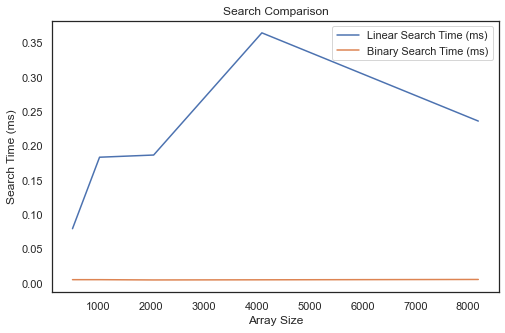

In [260]:
sns.set_style("white")

ax = results[['Array Size', 'Linear Search Time (ms)', 'Binary Search Time (ms)']].plot.line(x='Array Size', title='Search Comparison',figsize=(8,5))
ax.set_xlabel('Array Size')
ax.set_ylabel('Search Time (ms)')
#ax.set_xticks([512, 1024, 2048, 4096, 8192]) #This looks very distorted on the graph
plt.show()


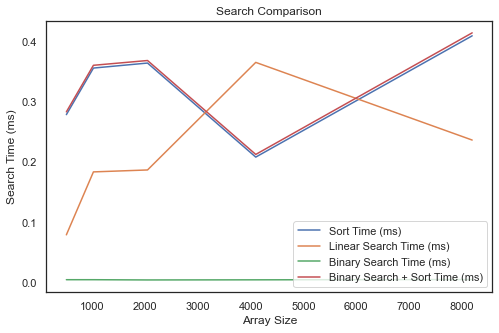

In [261]:

ax = results.plot.line(x='Array Size', title='Search Comparison', figsize=(8,5))
ax.set_xlabel('Array Size')
ax.set_ylabel('Search Time (ms)')
plt.show()

<h1>Executive Summary of Results</h1>

In the beginning of this search algorithm benchmark, we saw that Numpy sort, or np.sort(), greatly outperformed sorted(). So Numpy sort algorithm was used for the purposes of exploring search algorithms. <br>

When searching for the max value in the array, the binary search geatly outperformed the linear search, because there were less computations to do.  Picking the max value as our test value highlighted how the logarithmic nature of the binary search helped it to be speedy when there were many values to test. This showed us the worst case scenerio for the search, which is also described by Big O notation. Big O establishes a worst-case runtime and gives us the number of operations required to do the search by using the following mathematical approach. <br><br> 
Linear searches (simple searches) are O(n), "linear time"<br>
Binary searhces are O(log2(n)), "log time", <br>
Where n is # of items to search. <br><br>

Since the linear algorithm was doing n searches, this means for the last array, it had to perform 8192 operations, whereas the binary search only had to perform log2(8192), or 13 operations.  Since binary searches are logarithmic, linear searches will never "catch up", and binary searches will always outperform them substantially.


<h2>Github repository: </h2><br> <a href='https://github.com/sandrafield/MSDS-432-Data-Engineering'>https://github.com/sandrafield/MSDS-432-Data-Engineering</a>